# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

#Importing Libraries

In [1]:
#Data Wrangling
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingRandomSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

from sklearn.metrics import (accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             roc_auc_score,
                             roc_curve, 
                             log_loss, 
                             confusion_matrix, 
                             classification_report, 
                             plot_precision_recall_curve,
                             make_scorer)

#Suppress Future warnings
import warnings
warnings.filterwarnings('ignore')

#Reading the Dataset

In [2]:
#Define url for stored dataset
url = 'https://drive.google.com/uc?export=download&id=1AW5Gz6IqktDOoIjaBeWvy-HMaF5Y84sX'

#Read the csv file into pandas dataframe
data = pd.read_csv(url)

###Observing raw data visually 

In [3]:
#Getting the first 5 observations
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
#Getting the last 5 observations
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


###Dropping 'id' column

We will drop 'id' column because it is redundant and has high cardinality and does not contribute in any way for prediction.


In [5]:
data.drop(columns='id', inplace=True)

###Data Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


###Descriptive Statistics

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


###Checking for Missing Observations

In [8]:
print('Missing value count with respect to each column:')
data.isna().sum()

Missing value count with respect to each column:


Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

###Identifying continuous and discrete features

Since we do not have a lot of features in the raw dataset, a visual inspections looking at counts of unique values of each features will be enough.

In [9]:
for col in data.columns:
    print(f"{col}: ")
    print("")
    print(data[col].unique())
    print("")

Gender: 

['Male' 'Female']

Age: 

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage: 

['Yes' 'No']

Annual_Premium: 

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel: 

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54

###Defining Continuous and Discrete Features

In [10]:
discrete_features = [i for i in data.columns if data[i].nunique() <= 3]

print('Discrete Features: ', discrete_features)

continuous_features = [i for i in data.columns if i not in discrete_features]

print('Continuous Features: ', continuous_features)

Discrete Features:  ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
Continuous Features:  ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


###**Observations**

* Our original Dataset contains 381109 rows and 12 columns.
* There are 5 numerical and 5 catagorical features present in our dataset.
* Our target variable ('Response') is catagorical and dichotomous, hence this is a **Binary Classification** problem.
* There are no **Null** values present in our dataset.

#EDA, Data Cleaning and Manipulation

##Handling Outliers

###Checking for outliers

We can use distplots and boxplots to visualize distribution and find outliers in the features

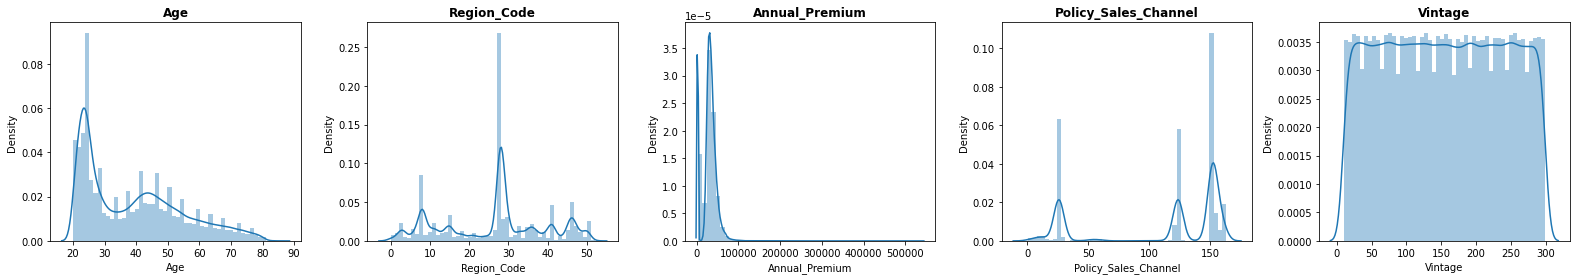

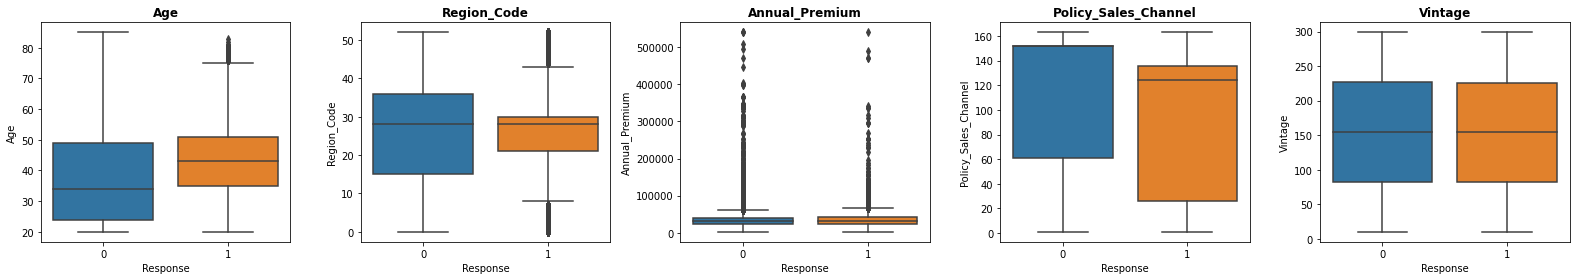

In [11]:
# Plotting Distributions
plt.figure(figsize=(22,4))
for n,column in enumerate(continuous_features):
  plt.subplot(1, 5, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

#Boxplots for detecting outliers
plt.figure(figsize=(22,4))
for n,column in enumerate(continuous_features):
  plt.subplot(1, 5, n+1)
  sns.boxplot(x=data['Response'], y=data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

####Observations:
* **Annual_Premium** appears to contain a large number of outliers and is positively skewed.
* Other features do not seem to contain a lot of outliers.
* **Age** is a little skewed toward right but we do not need to treat them.

###Treating Outliers

We will be using quantile method to treat outliers in 

In [12]:
#Defining Median, Q1 and Q3 for 'Annual_Premium' column
q1, q3, median = data['Annual_Premium'].quantile([0.25,0.75,0.5])

#Finding upper and lower limits
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)

#Applying quantiles to Annual_Premium feature to treat outliers
data['Annual_Premium'] = np.where(data['Annual_Premium'] > upper_limit, median,np.where(
                            data['Annual_Premium'] < lower_limit,median,data['Annual_Premium']))

Text(0.5, 1.0, 'Annual_Premium')

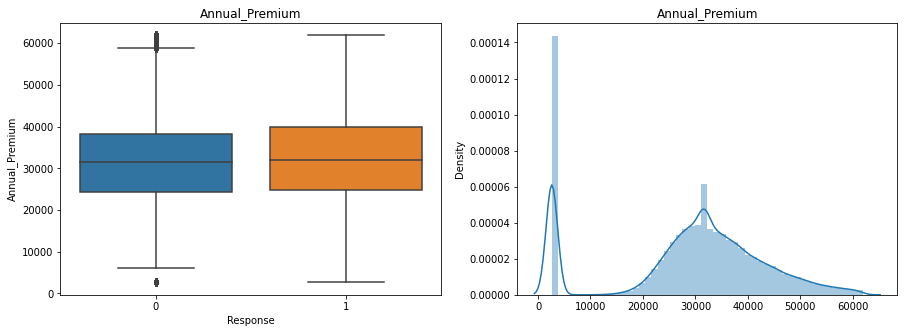

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x=data['Response'], y=data['Annual_Premium']).set_title('Annual_Premium')
sns.distplot(ax = axes[1], x=data['Annual_Premium']).set_title('Annual_Premium')

####Observations:
* **Annual_Premium** no longer contains outliers

##Univariate Analysis

###Target variable

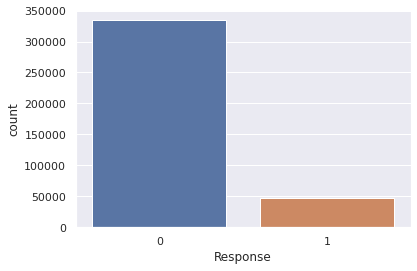

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(data['Response'])

###Categorical Features

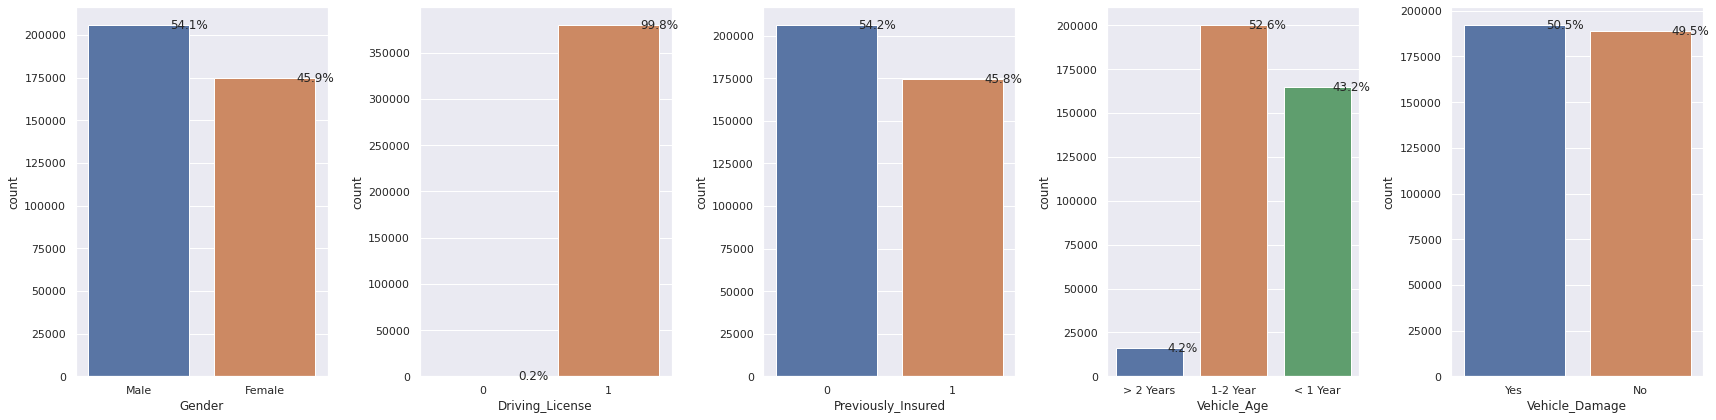

In [15]:
plt.figure(figsize=(24,6))
for n,column in enumerate(discrete_features[:-1]):
  plt.subplot(1, 5, n+1)
  sns.set_theme(style="darkgrid")
  ax = sns.countplot(data[column])

  total = float(len(data))
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
  plt.tight_layout()

###Numeric Features

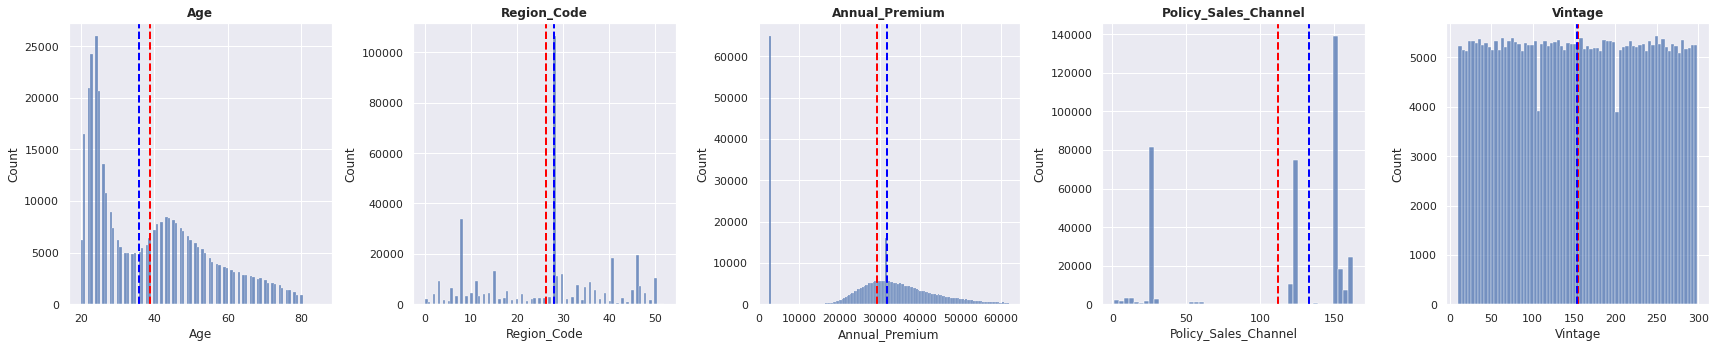

In [16]:
plt.figure(figsize=(24,5))
for n,column in enumerate(continuous_features):
  feature = data[column]
  ax=plt.subplot(1, 5, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

####Observations:
* Target Variable **Response** contains mostly 0(Not interested) values in the data. Since there is a class imbalance, we should handle it using some suitable resampling technique.


* **Gender** column suggests that number of Male customers is higher than Female customers.
* Almost all of the customers posess a driving license. 
* About half the customers have been previously insured.
* Vechles with age 1-2 years are prevalant in our data.
* Almost half the vehicles have already suffered some

 


##Bivariate Analysis

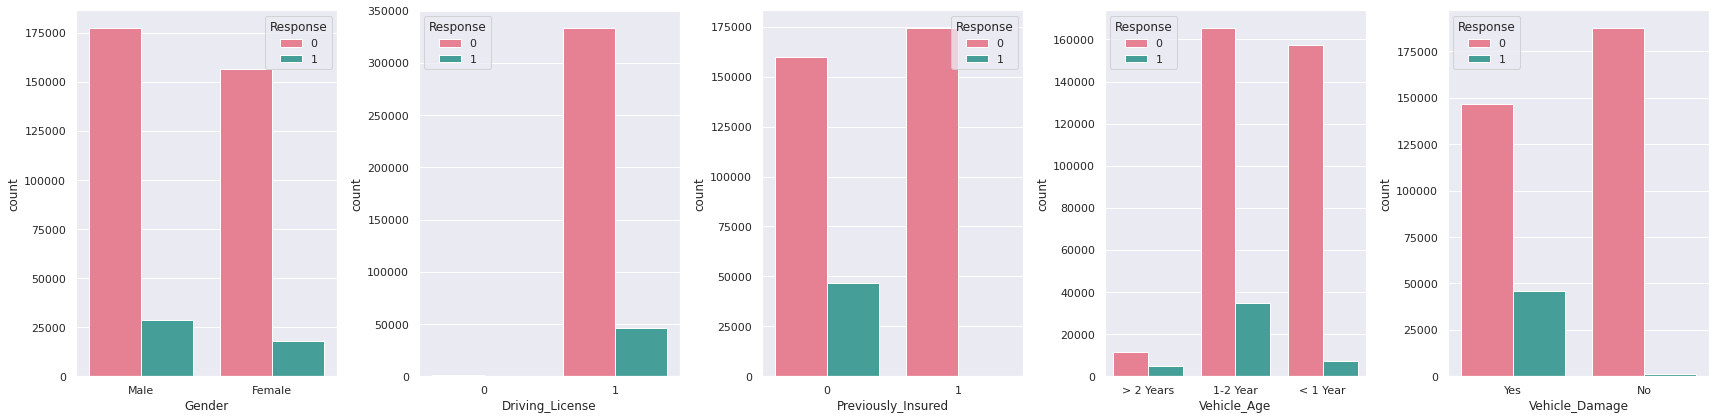

In [17]:
#Plotting Countplots for categorical features with respect to the target variables
plt.figure(figsize=(24,6))
for n,column in enumerate(discrete_features[:-1]):
  plt.subplot(1, 5, n+1)
  sns.set_theme(style="darkgrid")
  ax = sns.countplot(x=data[column], hue=data['Response'], palette='husl')
  plt.tight_layout()

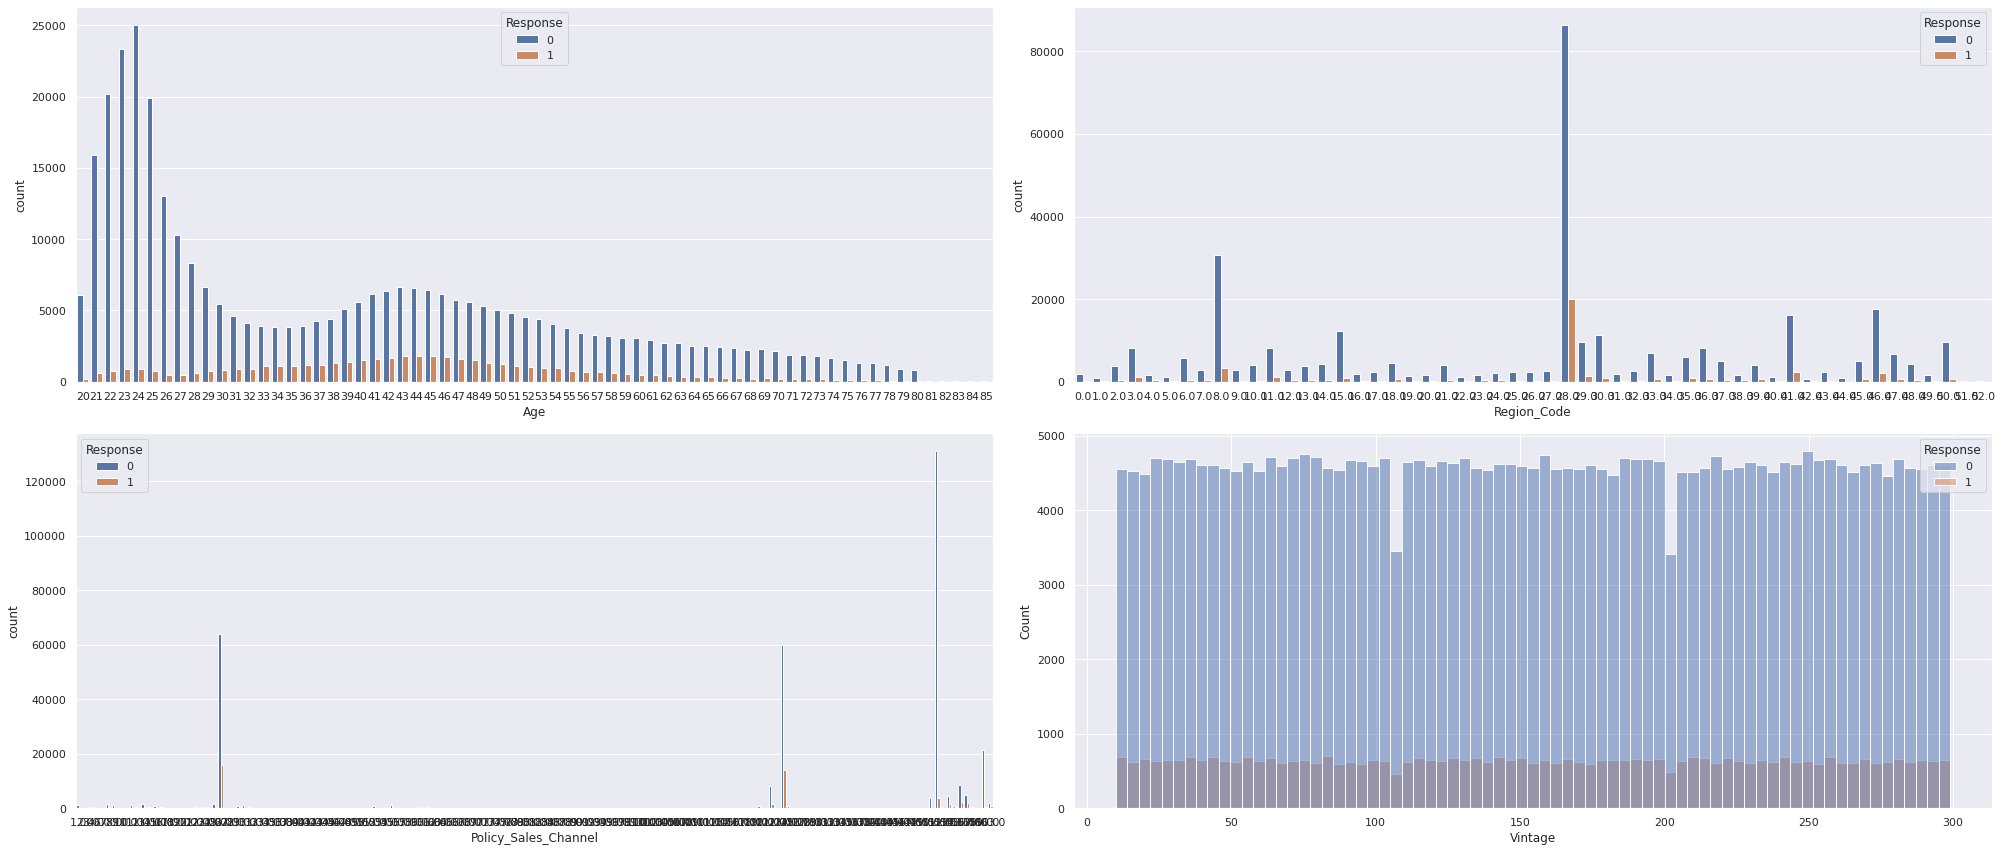

In [18]:
#Plotting distributions for numeric features with respect to the target variables

#Define subplots and axes
fig, axes = plt.subplots(2,2, figsize=(28,12))

#Distribution for Age
sns.countplot(ax = axes[0][0],x = 'Age', data = data, hue='Response')

#Distribution for Region_Code
sns.countplot(ax = axes[0][1],x = 'Region_Code', data = data, hue='Response')

#Distribution for Policy_Sales_Channel
sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = data, hue='Response')

#Distribution for Vintage
sns.histplot(ax = axes[1][1], x = data['Vintage'],data = data, hue='Response')

plt.tight_layout()

####Observations:
* The Response is similar from both Gender groups.
* Driving_Licence feature appears to be redundant as previously seen, most observations suggest that the user posseses a driving license.
* The customers who are previously insured do not show a positive response.
* Customers having 1-2 years old and already damaged vehicle seem to show a positive response.
* There is a huge dispersion of numeric features w.r.t the target variables.
* Data shows that the customers af age 35-55 years are most likely to buy the vehicle insurance.

##Feature Engineering

####Converting Numeric Feature to Categorical
* We will bin 'Region_Code' into 5 different regions.
* We will then delete the original 'Region_Code' column.

In [19]:
#Exploring 'Region_Code' feature
data['Region_Code'].value_counts().sort_index()

0.0       2021
1.0       1008
2.0       4038
3.0       9251
4.0       1801
5.0       1279
6.0       6280
7.0       3279
8.0      33877
9.0       3101
10.0      4374
11.0      9232
12.0      3198
13.0      4036
14.0      4678
15.0     13308
16.0      2007
17.0      2617
18.0      5153
19.0      1535
20.0      1935
21.0      4266
22.0      1309
23.0      1960
24.0      2415
25.0      2503
26.0      2587
27.0      2823
28.0    106415
29.0     11065
30.0     12191
31.0      1960
32.0      2787
33.0      7654
34.0      1664
35.0      6942
36.0      8797
37.0      5501
38.0      2026
39.0      4644
40.0      1295
41.0     18263
42.0       591
43.0      2639
44.0       808
45.0      5605
46.0     19749
47.0      7436
48.0      4681
49.0      1832
50.0     10243
51.0       183
52.0       267
Name: Region_Code, dtype: int64

In [20]:
#Creating a new column 'Region' from 'Region_Code'
data['Region'] = data['Region_Code'].apply(lambda x:'A' if 0<=x<=10 else 
                                           ('B' if 11<=x<=20 else 
                                            ('C' if 21<=x<=30 else 
                                             ('D' if 31<=x<=40 else 'E'))))

In [21]:
data.Region.value_counts().sort_index()

A     70309
B     47699
C    147534
D     43270
E     72297
Name: Region, dtype: int64

###Dropping unnecessary columns
* As explored earlier, almost all of the observations suggest the feature 'Driving_license' contains almost all the values as being 1. So we will drop that column from our dataset.
* Since we have engineered a new feature from 'Region_Code' column, it is no longer required, so we will drop that as well.

In [22]:
data.drop(columns=['Driving_License', 'Region_Code'], inplace=True)

In [23]:
data.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Region
0,Male,44,0,> 2 Years,Yes,40454.0,26.0,217,1,C
1,Male,76,0,1-2 Year,No,33536.0,26.0,183,0,A
2,Male,47,0,> 2 Years,Yes,38294.0,26.0,27,1,C
3,Male,21,1,< 1 Year,No,28619.0,152.0,203,0,B
4,Female,29,1,< 1 Year,No,27496.0,152.0,39,0,E


###Encoding Categorical Features

####Label Encoding
We can convert some categorical features as having numerical labels

In [24]:
# Defining a label encoder based on above data
encoder = {'Gender':{'Male':1, 'Female':0},'Vehicle_Damage':{'Yes':1, 'No': 0}}

# Label Encoding
data = data.replace(encoder)

####One Hot Encoding
One Hot Encoding is used to convert numerical categorical variables into binary vectors.

In [25]:
# One Hot Encoding
data = pd.get_dummies(data, columns=['Vehicle_Age', 'Region'])

In [26]:
#Reviewing final dataset
data.head()

,Gender,Age,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_A,Region_B,Region_C,Region_D,Region_E
0,1,44,0,1,40454.0,26.0,217,1,0,0,1,0,0,1,0,0
1,1,76,0,0,33536.0,26.0,183,0,1,0,0,1,0,0,0,0
2,1,47,0,1,38294.0,26.0,27,1,0,0,1,0,0,1,0,0
3,1,21,1,0,28619.0,152.0,203,0,0,1,0,0,1,0,0,0
4,0,29,1,0,27496.0,152.0,39,0,0,1,0,0,0,0,0,1


#####Remark:
* With this we have come up with the final dataset and can continue forward to model building and evaluation.

#Model Building

Before jumping into building the model, there are a few more steps that we must execute. These are:
* Defining Independant features (X), and Target Variable (y)
* Class Imbalance Handling
* Train-Test Split (X_train, X_test, y_train, y_test)
* Feature Scaling 

##Prerequisites

###Independant and Target Variables

In [27]:
#X represents a dataframe with all independant features
X = data.drop(['Response'], axis=1)

#Checking the shape
print(X.shape)

# y represents the target variable
y = data['Response']

#Checking the shape
print(y.shape)

(381109, 15)
(381109,)


###Handling Class Imbalance
As previously explored, there is a huge class imbalance in our dataset

In [28]:
from imblearn.over_sampling import SMOTE
#Defining the resampling technique
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

Let's see the difference between original data and resampled data

Before resampling:  
 0    334399
1     46710
Name: Response, dtype: int64
After resampling:  
 1    334399
0    334399
Name: Response, dtype: int64


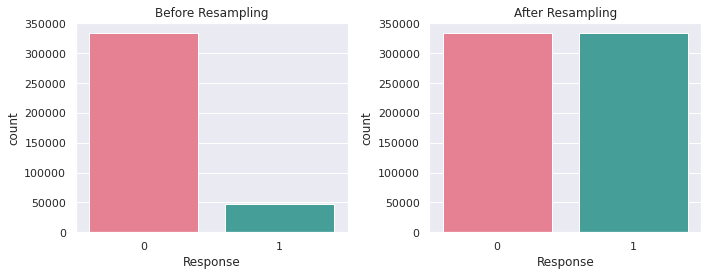

In [29]:
#Classes in the predictor variable before resampling
print('Before resampling: ','\n', y.value_counts())

#Classes in the predictor variable after resampling
print('After resampling: ','\n', y_smote.value_counts())

#Let's visualise the difference
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.countplot(y,palette='husl', ax=ax[0]).set_title('Before Resampling')
sns.countplot(y_smote,palette='husl', ax=ax[1]).set_title('After Resampling')
plt.tight_layout();

###Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split

#Splitting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=1)

###Feature Scaling
Scaling the data, i.e, normalizing the data is important before fitting the model 

In [31]:
# #Define scaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [32]:
#Define scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Helper functions
We will define a helper function that;
* Trains the model
* Evaluates and plots the results

In [33]:
import time

In [34]:
def model_eval(model, X_train, X_test, y_train, y_test, best_parameter=True):
  '''
  Arguments:
    model: model to be fitted
    X_train: independant training data
    X_test: independant test data
    y_train: training target variable
    y_test: test target variable

  Features: This feature trains and evaluates the model on both train and test data

  Returns: Train Confusion Matrix, Train AUC_ROC Curve, Train Evaluation Metrics, 
           Test Confusion Matrix, Test AUC_ROC Curve and Test Evaluation Metrics
  '''

  #storing the start time of model training
  start=time.time()

  #Fitting the model
  model.fit(X_train, y_train)

  #storing the time when the model ended trining 
  stop = time.time()
  #calculating the total time taken for model training 
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")

  # finding the best parameters of the model if any 
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass

  #Evaluating the model
  for x, actual, title in ((X_train, y_train, 'Train'), (X_test, y_test, 'Test')):

    #Model Predictions:
    pred = model.predict(x)
    prob = model.predict_proba(x)[:,1]

    #Visualizing evaluations
    plt.figure(figsize=(20,4))

    # Confusion Matrix
    cm = confusion_matrix(actual, pred)

    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.subplot(1,3,1)
    sns.heatmap(cm, annot=labels, fmt='')
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # AUC_ROC Curve
    fpr, tpr, th = roc_curve(actual, prob)

    plt.subplot(1,3,2)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{title} AUC-ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

    #Evaluation Metrics

    #List for names of different metrics
    eval_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score', 'Log Loss']

    #Evaluation Scores
    eval_score = [
                  accuracy_score(actual,pred),
                  precision_score(actual,pred),
                  recall_score(actual,pred),
                  f1_score(actual,pred),
                  roc_auc_score(actual,pred),
                  log_loss(actual,pred)
                  ]
    #Evaluation DataFrame
    eval_df = pd.DataFrame(list(zip(eval_names, eval_score,)), columns=['Metric','Score'])

    #Visualizing Table
    plt.subplot(1,3,3)

    cell_text = []
    for row in range(len(eval_df)):
        cell_text.append(eval_df.iloc[row])

    colors = np.array(['lightgray']*12).reshape(6,2)
    plt.table(cellText=cell_text, colLabels=eval_df.columns, loc='center', cellLoc='center', cellColours=colors, colColours=(['darkgray']*2)).scale(1.2, 2.2)
    plt.axis('off')
    plt.title(f'{title} Evaluation Metrics')

  return model

In [35]:
#Define Scorer 
scorer = make_scorer(f1_score, pos_label=1)

In [36]:
# # Classifier
# a

# # HYperparameter Grid
# grid = b

# # GridSearch to find the best parameters
# c = HalvingRandomSearchCV(a, param_distributions = grid, scoring = scorer, cv=5, n_jobs=-1)

# #Fit and evaluate
# model_eval(b, X_train, X_test, y_train, y_test)

##1. Logistic Regression

Training time: 0.1559min
The best parameters found out to be : {'solver': 'sag', 'random_state': 2, 'penalty': 'l2', 'C': 0.1}


HalvingRandomSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                      param_distributions={'C': [100, 10, 1.0, 0.1, 0.01,
                                                 0.001],
                                           'penalty': ['l2'],
                                           'random_state': [2],
                                           'solver': ['newton-cg', 'lbfgs',
                                                      'liblinear', 'sag',
                                                      'saga']},
                      scoring=make_scorer(f1_score, pos_label=1))

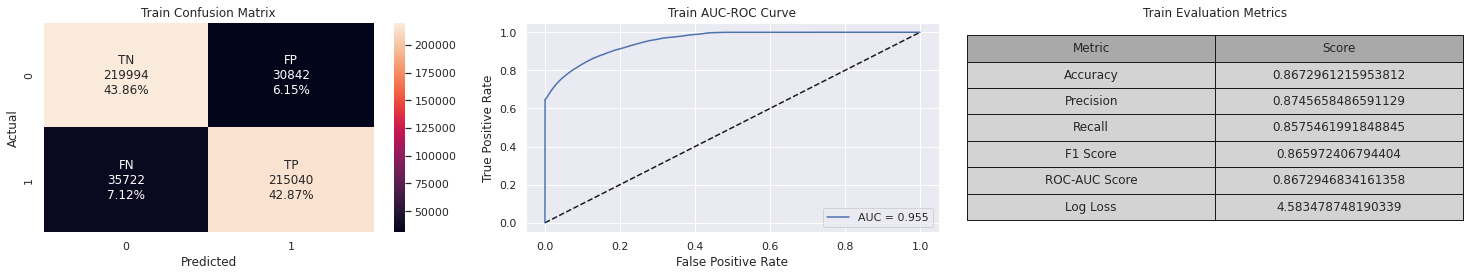

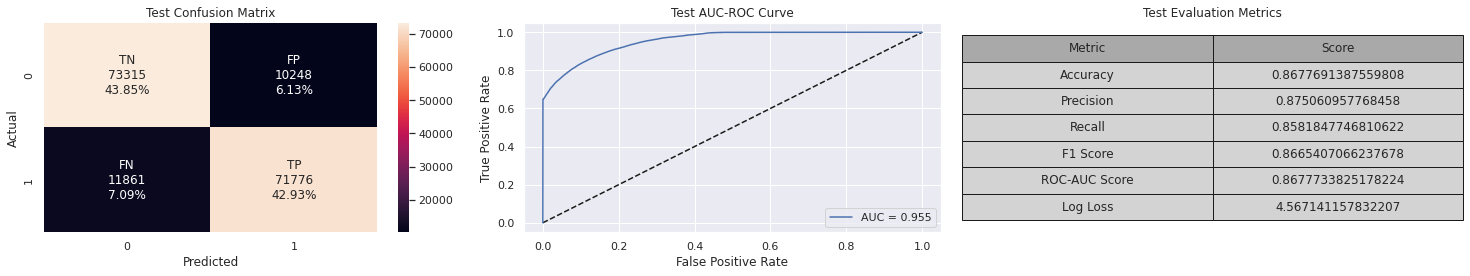

In [37]:
# Classifier
log_reg = LogisticRegression()

# HYperparameter Grid
grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                        'penalty' : ['l2'],
                        'C' : [100, 10, 1.0, 0.1, 0.01, 0.001], 
                       'random_state':[2]}

# Halving_Randomized_Search_CV to find the best parameters
log_reg_hpt = HalvingRandomSearchCV(log_reg, param_distributions = grid, scoring = scorer, cv=5, n_jobs=-1)

#Fit and evaluate
model_eval(log_reg_hpt, X_train, X_test, y_train, y_test)

##8. GaussianNB

Training time: 0.1097min
The best parameters found out to be : {'var_smoothing': 0.03511191734215131}


HalvingRandomSearchCV(estimator=GaussianNB(), n_jobs=-1,
                      param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                      scoring=make_scorer(f1_score, pos_label=1))

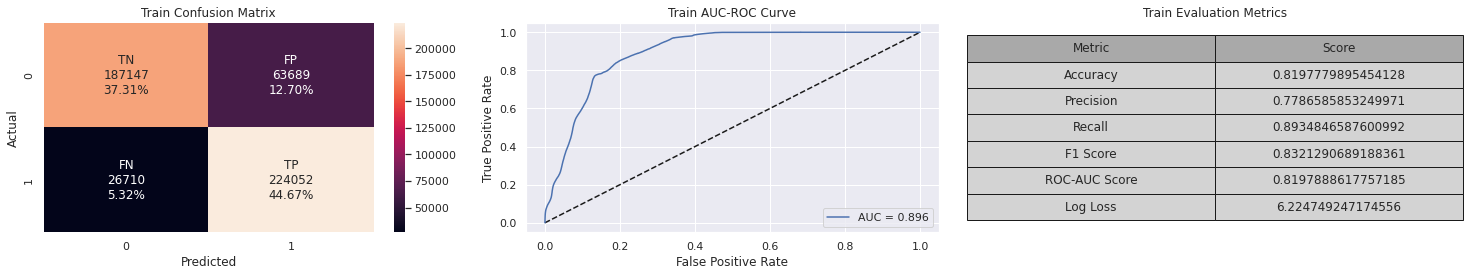

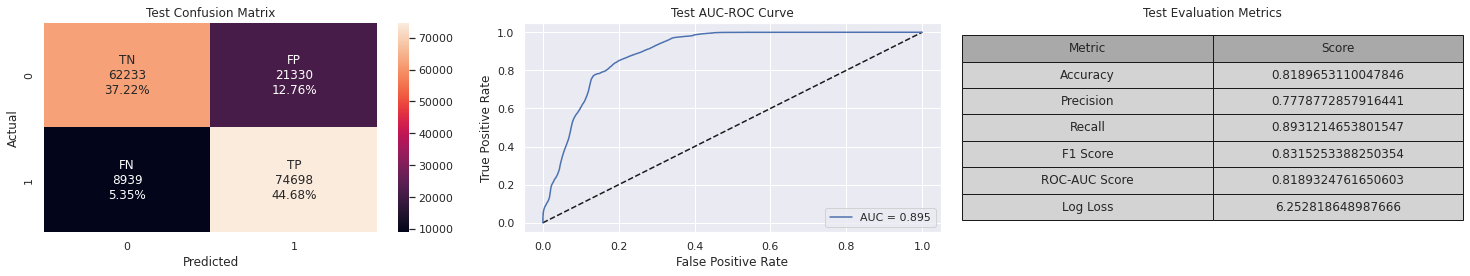

In [38]:
# Classifier
gnb = GaussianNB()

# HYperparameter Grid
grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Halving_Randomized_Search_CV to find the best parameters
gnb_hpt = HalvingRandomSearchCV(gnb, param_distributions = grid, scoring = scorer, cv=5, n_jobs=-1)

#Fit and evaluate
model_eval(gnb_hpt, X_train, X_test, y_train, y_test)

##7. K-Nearest Neighbours

In [39]:
# # Classifier
# knn = KNeighborsClassifier(n_neighbors=5)

# # HYperparameter Grid
# grid = {'n_neighbors' : [5,7,9]}

# # Halving_Randomized_Search_CV to find the best parameters
# knn_hpt = HalvingRandomSearchCV(knn, param_distributions = grid, scoring = scorer, cv=5, n_jobs=-1)

# #Fit and evaluate
# model_eval(knn_hpt, X_train, X_test, y_train, y_test)

##2. Decision Trees

Training time: 2.5913min
The best parameters found out to be : {'splitter': 'random', 'random_state': 23, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 3, 'max_leaf_nodes': 60, 'max_features': None, 'max_depth': 9}


HalvingRandomSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                      param_distributions={'max_depth': [None, 5, 7, 9],
                                           'max_features': ['auto', 'log2',
                                                            'sqrt', None],
                                           'max_leaf_nodes': [None, 30, 40, 50,
                                                              60],
                                           'min_samples_leaf': [1, 2, 3, 4, 5],
                                           'min_weight_fraction_leaf': [0.0,
                                                                        0.3,
                                                                        0.4,
                                                                        0.5],
                                           'random_state': [23],
                                           'splitter': ['best', 'random']},
                      scoring=

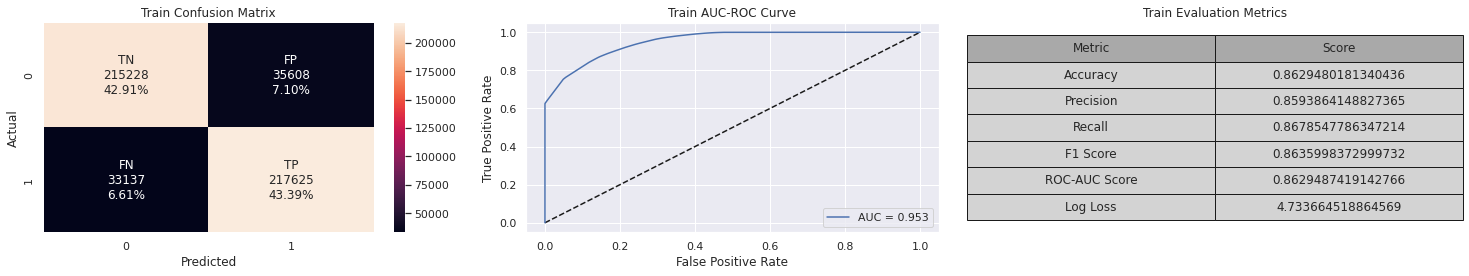

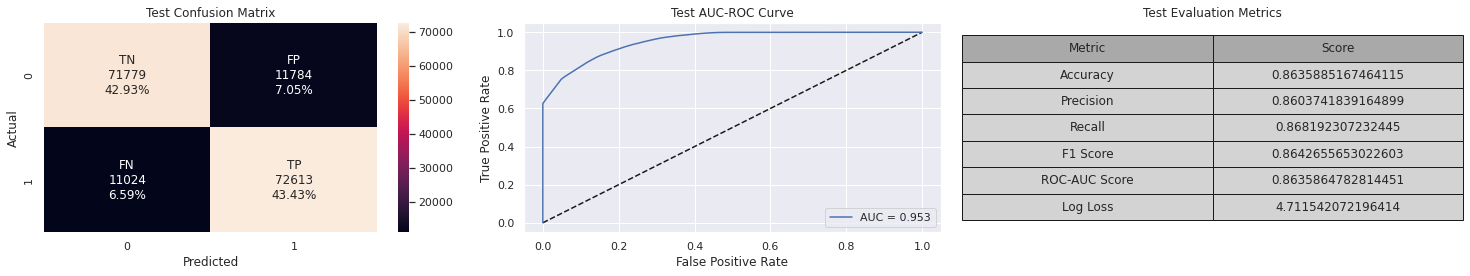

In [40]:
# Classifier
dt = DecisionTreeClassifier()

# HYperparameter Grid
grid = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[23]}

# Halving_Randomized_Search_CV to find the best parameters
dt_hpt = HalvingRandomSearchCV(dt, param_distributions = grid, scoring = scorer, cv=5, n_jobs=-1)

#Fit and evaluate
model_eval(dt_hpt, X_train, X_test, y_train, y_test)

##3. Random Forest

Training time: 1.756min
The best parameters found out to be : {'n_estimators': 125, 'max_depth': 15, 'criterion': 'entropy'}


HalvingRandomSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                      param_distributions={'criterion': ['entropy'],
                                           'max_depth': [7, 10, 15],
                                           'n_estimators': [100, 125, 150]},
                      scoring=make_scorer(f1_score, pos_label=1))

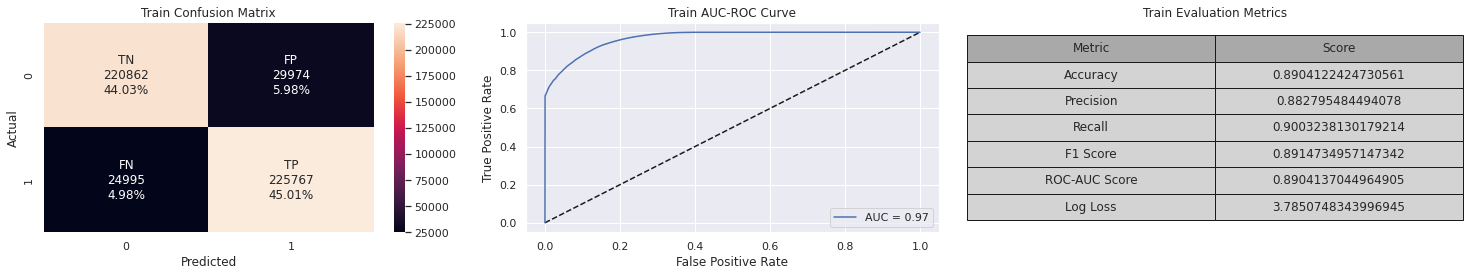

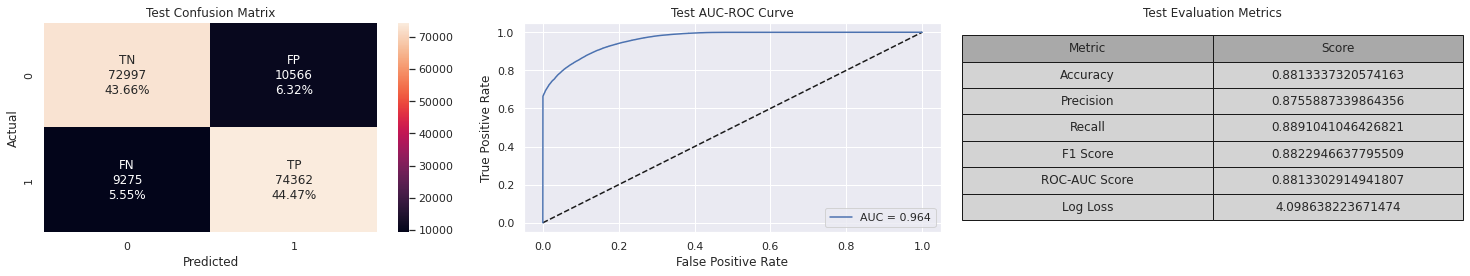

In [41]:
# Classifier
rf = RandomForestClassifier()

# HYperparameter Grid
grid = {'n_estimators': [100,125,150],
        'max_depth': [7,10,15],
        'criterion': ['entropy']
        }

# GridSearch to find the best parameters
rf_hpt = HalvingRandomSearchCV(rf, param_distributions = grid, scoring = scorer, cv=5, n_jobs=-1)

#Fit and evaluate
model_eval(rf_hpt, X_train, X_test, y_train, y_test)

##4. XGBoost

Training time: 3.2541min
The best parameters found out to be : {'n_estimators': 100, 'max_depth': 15, 'criterion': 'entropy'}


HalvingRandomSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                      param_distributions={'criterion': ['entropy'],
                                           'max_depth': [7, 10, 15],
                                           'n_estimators': [100, 125, 150]},
                      scoring=make_scorer(f1_score, pos_label=1))

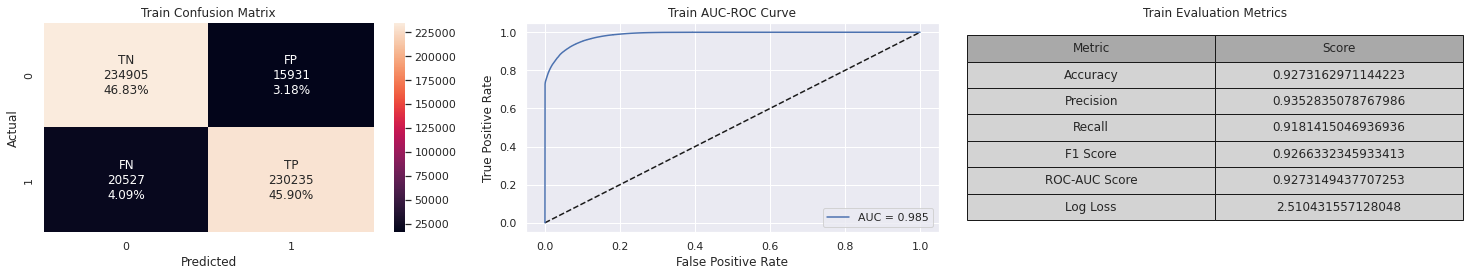

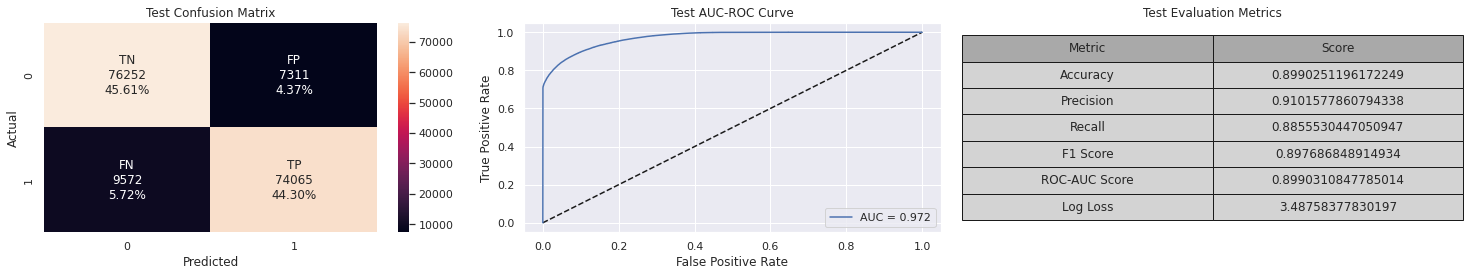

In [42]:
# Classifier
xgb = XGBClassifier()

# HYperparameter Grid
grid = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}

# Halving_Randomized_Search_CV to find the best parameters
xgb_hpt = HalvingRandomSearchCV(xgb, param_distributions = grid, scoring = scorer, cv=5, n_jobs=-1)

#Fit and evaluate
model_eval(xgb_hpt, X_train, X_test, y_train, y_test)

##5. LightGBM

Training time: 2.198min
The best parameters found out to be : {'n_estimators': 200, 'min_data_in_leaf': 100, 'max_depths': 7.0, 'learning_rate': 0.01}


HalvingRandomSearchCV(estimator=LGBMClassifier(),
                      param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                           'max_depths': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]),
                                           'min_data_in_leaf': [100, 200, 250,
                                                                300],
                                           'n_estimators': [50, 100, 120, 150,
                                                            200]},
                      scoring=make_scorer(f1_score, pos_label=1))

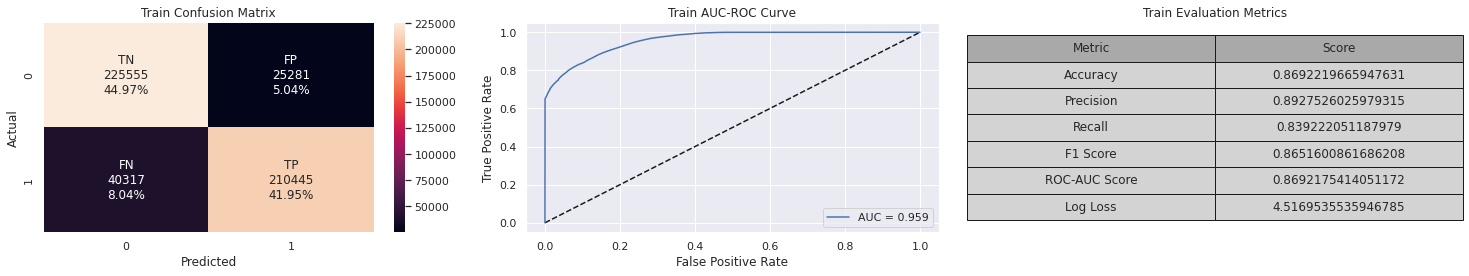

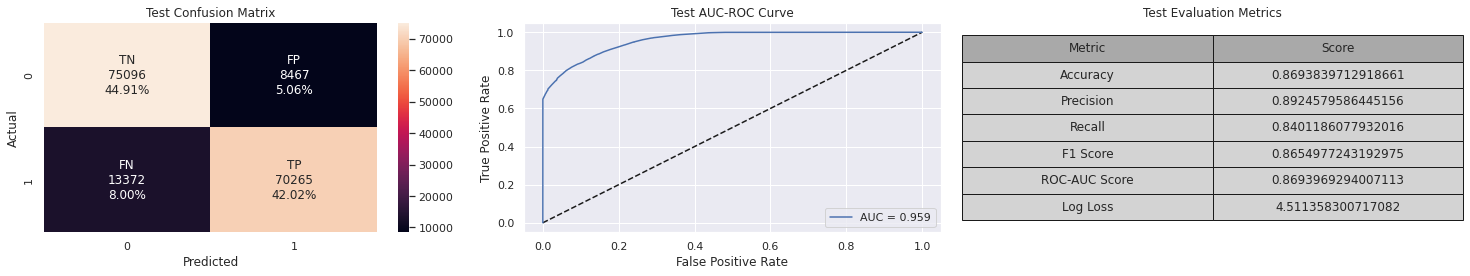

In [43]:
# Classifier
lgbm = lgb.LGBMClassifier()

# HYperparameter Grid
grid = {
    'max_depths': np.linspace(1, 32, 32, endpoint=True),
    'min_data_in_leaf':[100, 200, 250, 300],
    'n_estimators':[50,100, 120,150,200],
    'learning_rate':[.001,0.01,.1]
      }

# Halving_Randomized_Search_CV to find the best parameters
lgbm_hpt = HalvingRandomSearchCV(lgbm, param_distributions = grid, scoring = scorer, cv=5)

#Fit and evaluate
model_eval(lgbm_hpt, X_train, X_test, y_train, y_test)

##6. CatBoost

In [44]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from catboost import CatBoostClassifier

Training time: 0.6636min
The best parameters found out to be : {'n_estimators': 150, 'max_depth': 7}


HalvingRandomSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f992016bed0>,
                      param_distributions={'max_depth': [7, 10, 15],
                                           'n_estimators': [100, 125, 150]},
                      scoring=make_scorer(f1_score, pos_label=1))

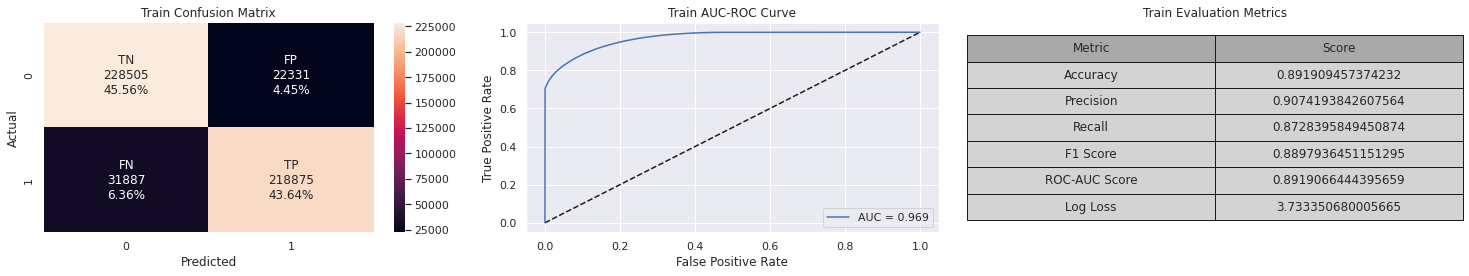

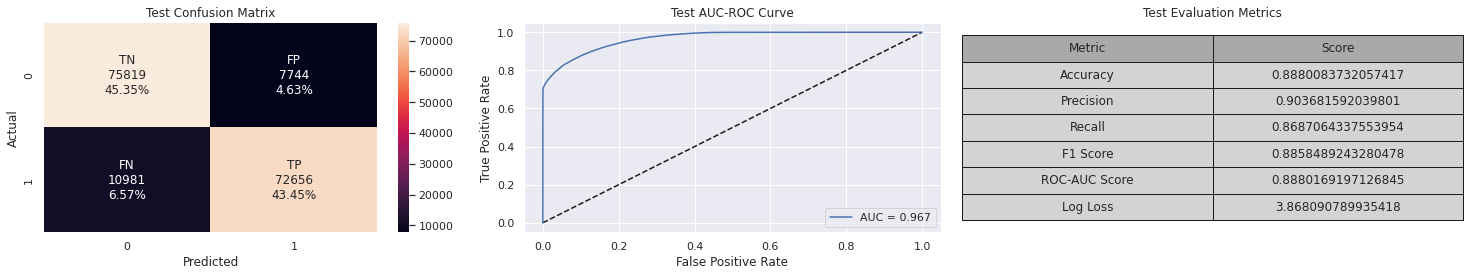

In [46]:
# Classifier
cb = CatBoostClassifier(verbose=0)

# HYperparameter Grid
grid = {'n_estimators': [100,125,150],'max_depth': [7,10,15]}

# Halving_Randomized_Search_CV to find the best parameters
cb_hpt = HalvingRandomSearchCV(cb, param_distributions = grid, scoring = scorer, cv=5)

#Fit and evaluate
model_eval(cb_hpt, X_train, X_test, y_train, y_test)